In [40]:
%matplotlib inline
import pickle
import numpy as np
from sklearn.mixture import GMM, DPGMM
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
import logging
import numpy as np
logging.basicConfig(level=logging.DEBUG,
                    format='%(filename)s[LINE:%(lineno)d]# %(levelname)-5s [%(asctime)s]  %(message)s')

In [75]:
file = open('Tfidf_coprus.pickle', 'rb')
corpus_tfidf = pickle.load(file)
svd = TruncatedSVD(200)
lsa = make_pipeline(svd, Normalizer(copy=False))
corpus_tfidf = lsa.fit_transform(corpus_tfidf)

file = open('Tf_coprus.pickle', 'rb')
corpus_tf = pickle.load(file)

In [95]:
gmm = GMM(n_components=20, covariance_type='spherical')
gmm_labels = gmm.fit_predict(corpus_tfidf)

In [96]:
km_model = KMeans(n_clusters=20)
kmeans_labels = km_model.fit_predict(corpus_tfidf)

In [92]:
dpgmm = DPGMM(n_components=10, alpha=20, covariance_type='diag')
dpgmm_labels = dpgmm.fit_predict(corpus_tf.toarray())

In [52]:
def silhouette_analysis(corpus, cluster_labels):
    n_cluster = len(np.unique(cluster_labels))
    plt.style.use('ggplot')
    fig = plt.figure(n_cluster, figsize=(8, 6))
    ax1 = plt.subplot(111)
    ax1.axis([0, len(cluster_labels) + (n_cluster + 1) * 25, -0.15, 1])
    logging.debug('Figure created')

    silhouette_avg = silhouette_score(corpus, cluster_labels)
    print('For n_clusters = {0} the average silhouette_score is :{1}'.format(n_cluster, silhouette_avg))
    sample_silhouette_values = silhouette_samples(corpus, cluster_labels)
    x_left = 25
    for i in range(n_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        ith_cluster_silhouette_values = ith_cluster_silhouette_values[::-1]
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        x_right = x_left + size_cluster_i
        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_between(np.arange(x_left, x_right), 0, ith_cluster_silhouette_values, facecolor=color,
                         edgecolor=color, alpha=0.7, label='{}'.format(i))
        x_left = x_right + 25

    plt.title('The silhouette plot for {} clusters'.format(n_cluster))
    ax1.set_xlabel("Texts ids")
    ax1.set_ylabel("The silhouette coefficient values")
    ax1.axhline(y=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_xticks([])

    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    ax1.legend(loc='center left', fancybox=True, shadow=True, bbox_to_anchor=(1, 0.5), ncol=2)

    plt.show()

For n_clusters = 20 the average silhouette_score is :0.04890587478234509


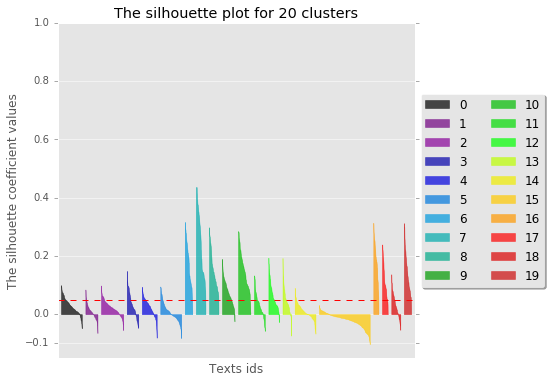

In [97]:
silhouette_analysis(corpus_tfidf, gmm_labels)

For n_clusters = 20 the average silhouette_score is :0.050119650402772


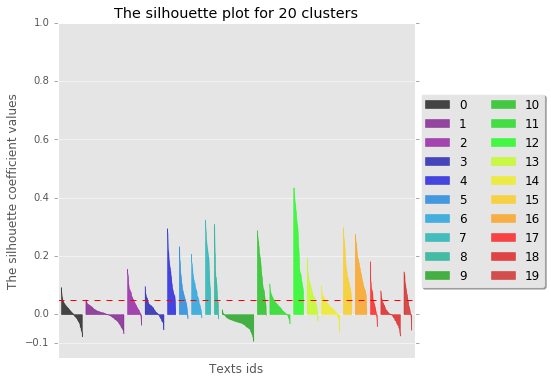

In [98]:
silhouette_analysis(corpus_tfidf, kmeans_labels)

For n_clusters = 10 the average silhouette_score is :-0.03404271576286776


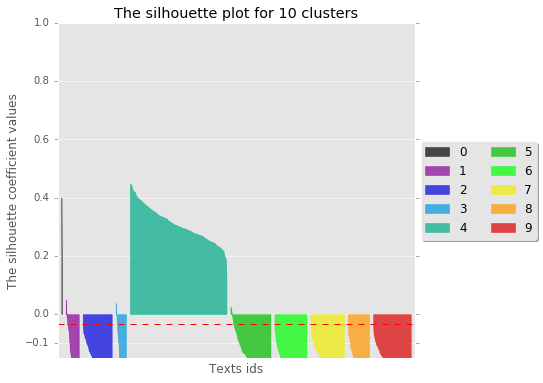

In [93]:
silhouette_analysis(corpus_tf, dpgmm_labels)

In [73]:
dpgmm_labels[4]

array([6, 6, 6, ..., 6, 6, 6])

In [102]:
file = open('Tfidf_feature_names.pickle', 'rb')
features = pickle.load(file)

In [ ]:
features